In [10]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from matplotlib.cbook import boxplot_stats
sb.set(rc={"figure.figsize":(30, 7)}) # set the default Seaborn style for graphics

In [2]:
dataset = pd.read_csv("train.csv", index_col="Id") #index_col is used to select a given row as the index
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Question 1a

LotArea has 69 outliers


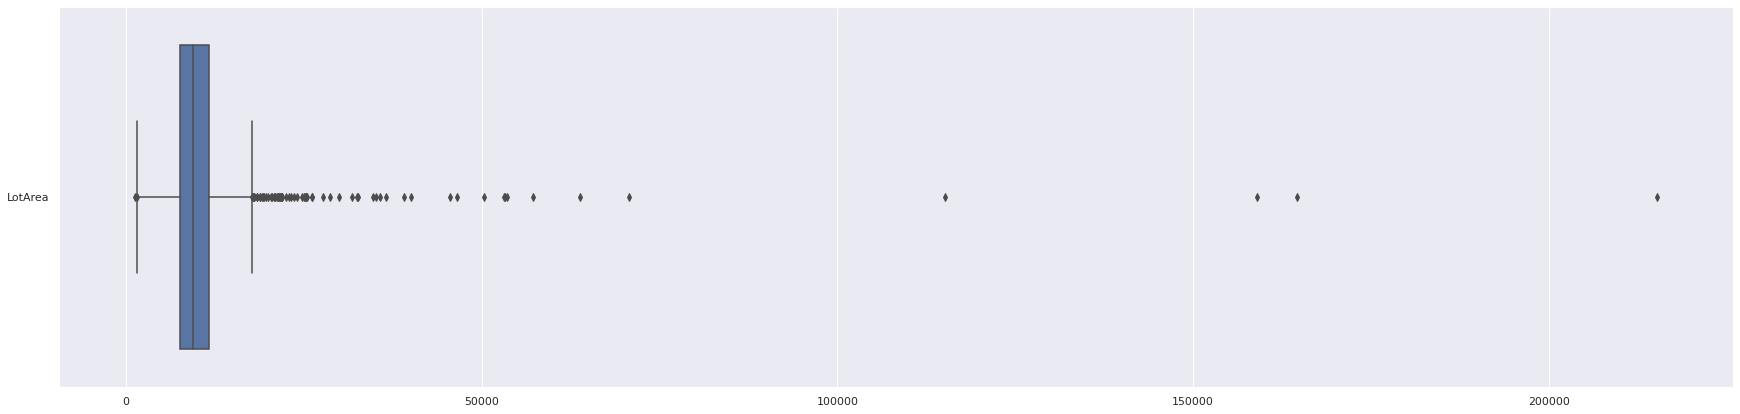

In [15]:
lot_area = pd.DataFrame(dataset["LotArea"])
sb.boxplot(data=lot_area, orient="h")

lot_area_outliers = boxplot_stats(lot_area)[0]["fliers"]
print(f"LotArea has {len(lot_area_outliers)} outliers")

GrLivArea has 31 outliers


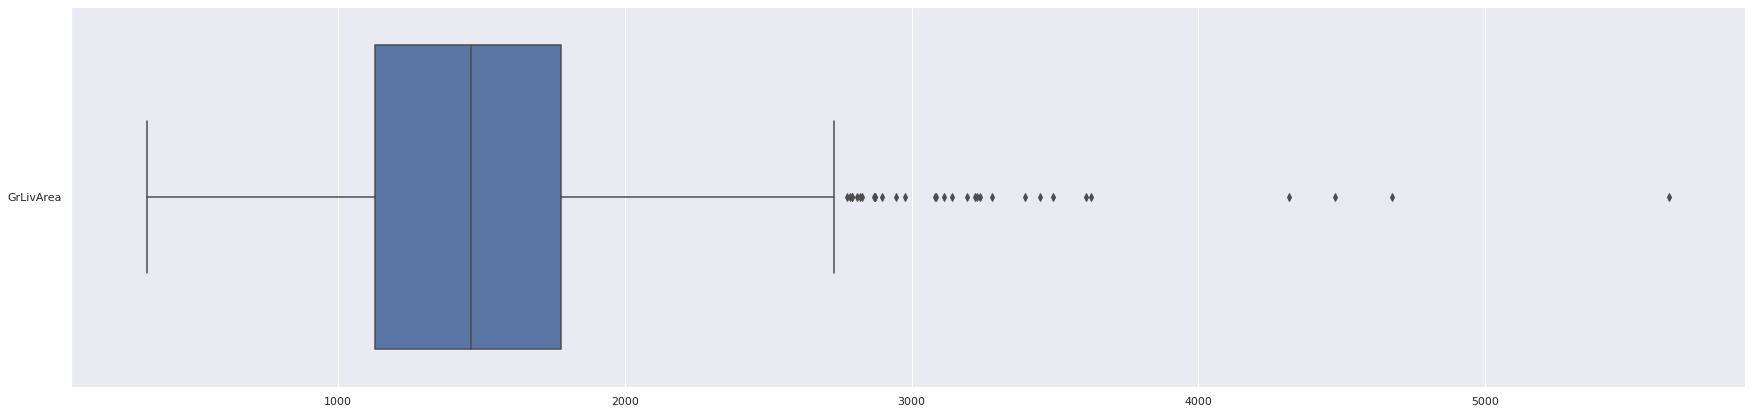

In [16]:
gr_liv_area = pd.DataFrame(dataset["GrLivArea"])
sb.boxplot(data=gr_liv_area, orient="h")

gr_liv_outliers = boxplot_stats(gr_liv_area)[0]["fliers"]
print(f"GrLivArea has {len(gr_liv_outliers)} outliers")

TotalBsmtSF has 61 outliers


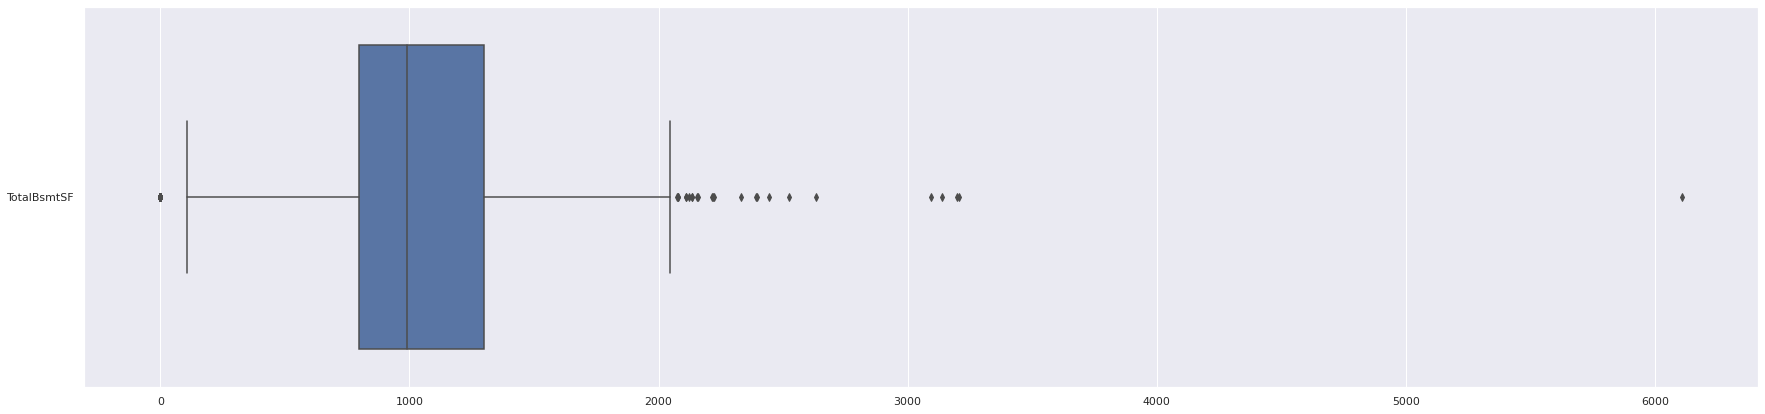

In [17]:
total_basement_sf = pd.DataFrame(dataset["TotalBsmtSF"])
sb.boxplot(data=total_basement_sf, orient="h")

total_basement_sf_outliers = boxplot_stats(total_basement_sf)[0]["fliers"]
print(f"TotalBsmtSF has {len(total_basement_sf_outliers)} outliers")

GarageArea has 21 outliers


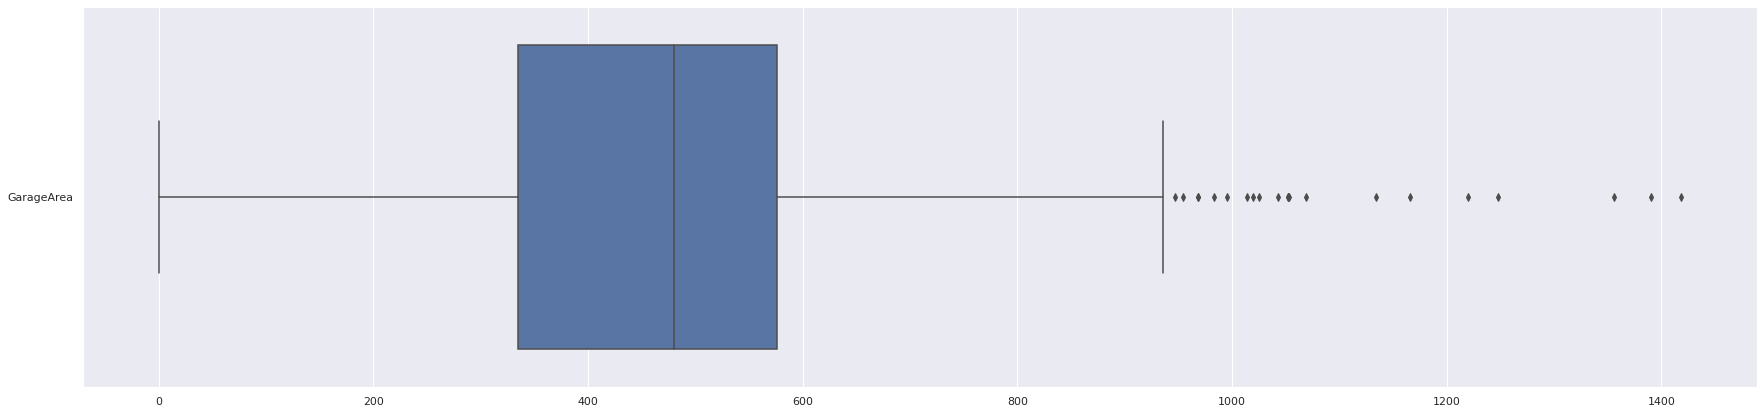

In [18]:
garage_area = pd.DataFrame(dataset["GarageArea"])
sb.boxplot(data=garage_area, orient="h")

garage_area_outliers = boxplot_stats(garage_area)[0]["fliers"]
print(f"GarageArea has {len(garage_area_outliers)} outliers")

LotArea has the maximum number of outliers. It has 69 outliers.

# Question 1b

<AxesSubplot:ylabel='Density'>

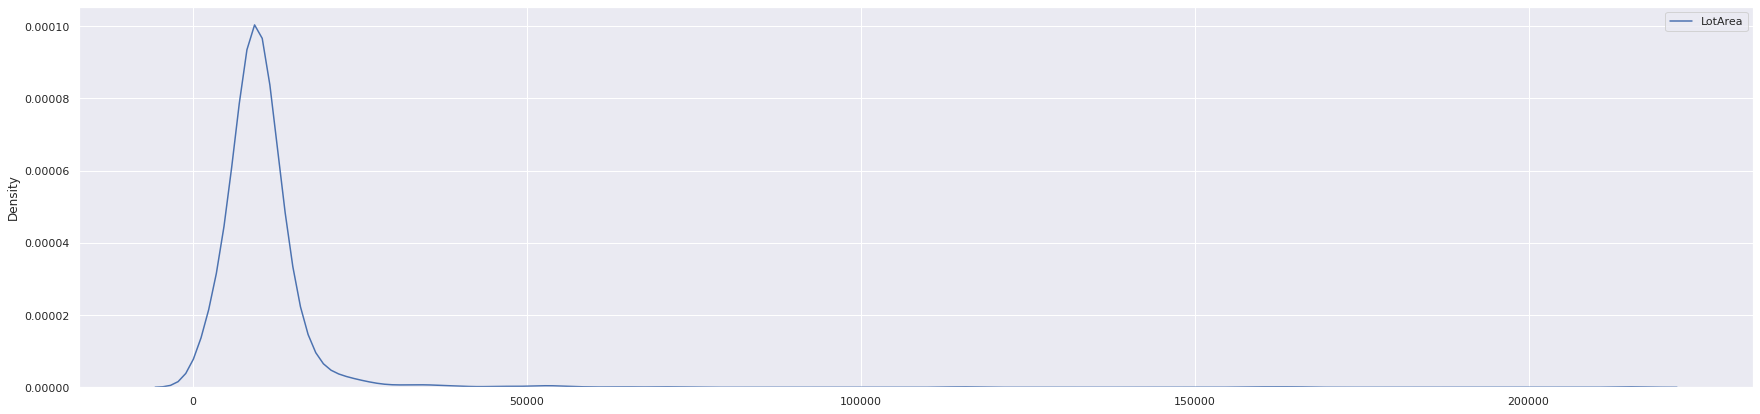

In [19]:
sb.kdeplot(data=lot_area)

<AxesSubplot:ylabel='Density'>

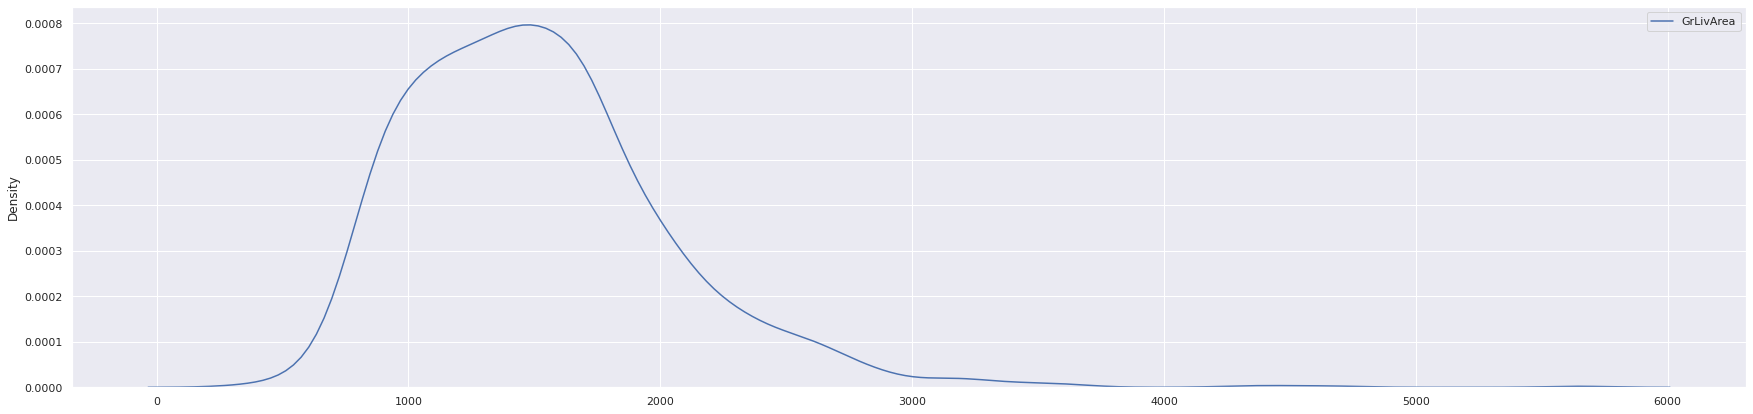

In [20]:
sb.kdeplot(data=gr_liv_area)

<AxesSubplot:ylabel='Density'>

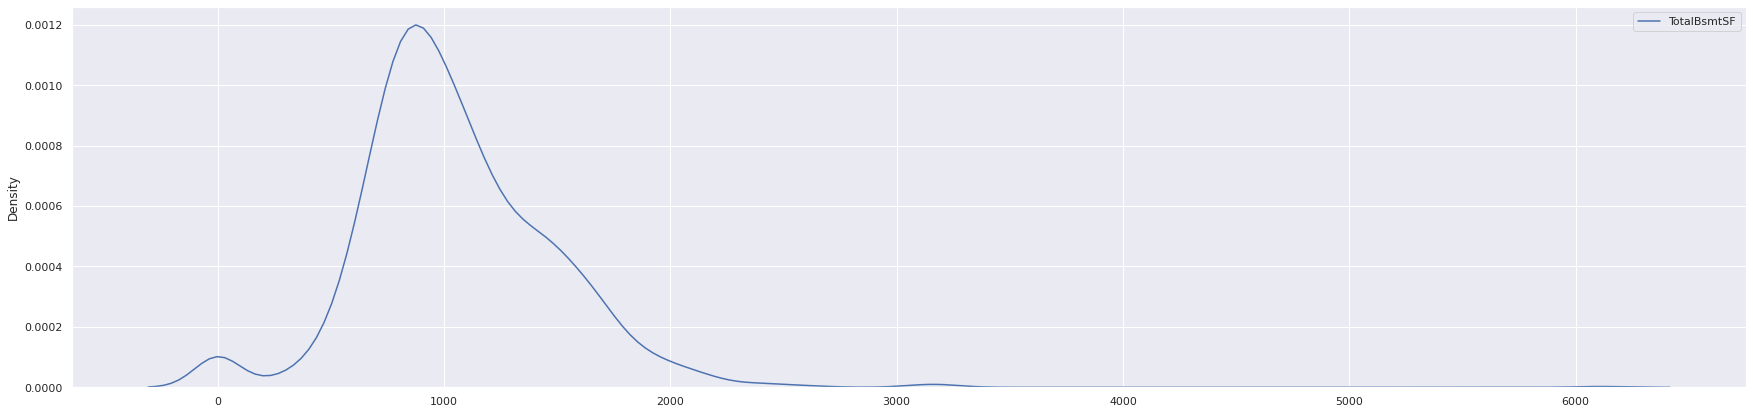

In [21]:
sb.kdeplot(data=total_basement_sf)

<AxesSubplot:ylabel='Density'>

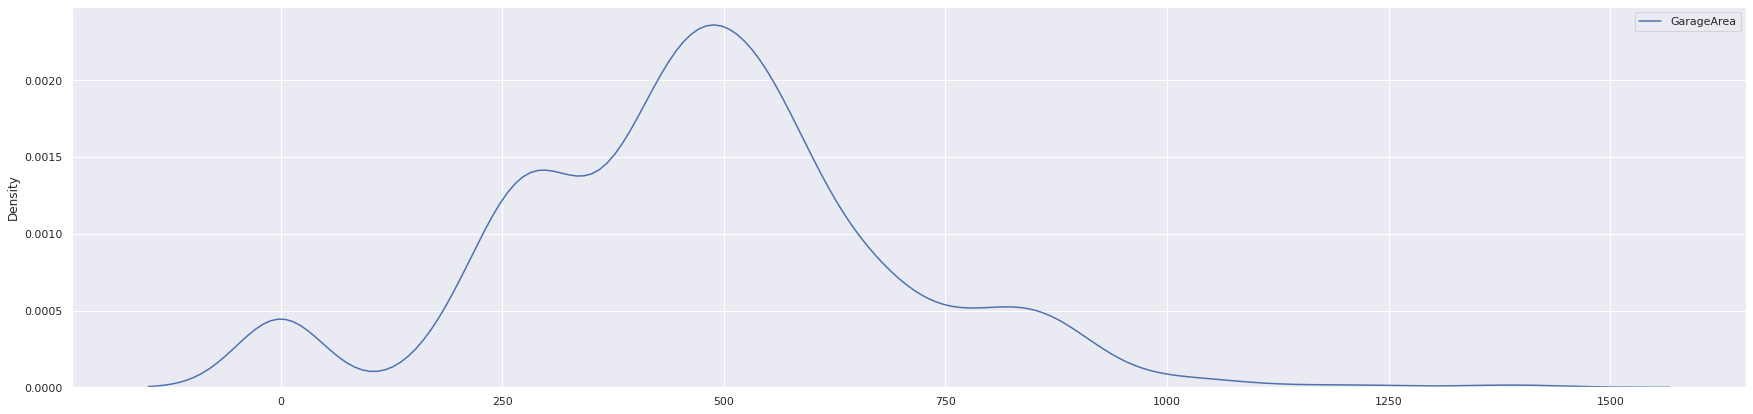

In [22]:
sb.kdeplot(data=garage_area)

# Question 1c

LotArea        0.263843
GrLivArea      0.708624
TotalBsmtSF    0.613581
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

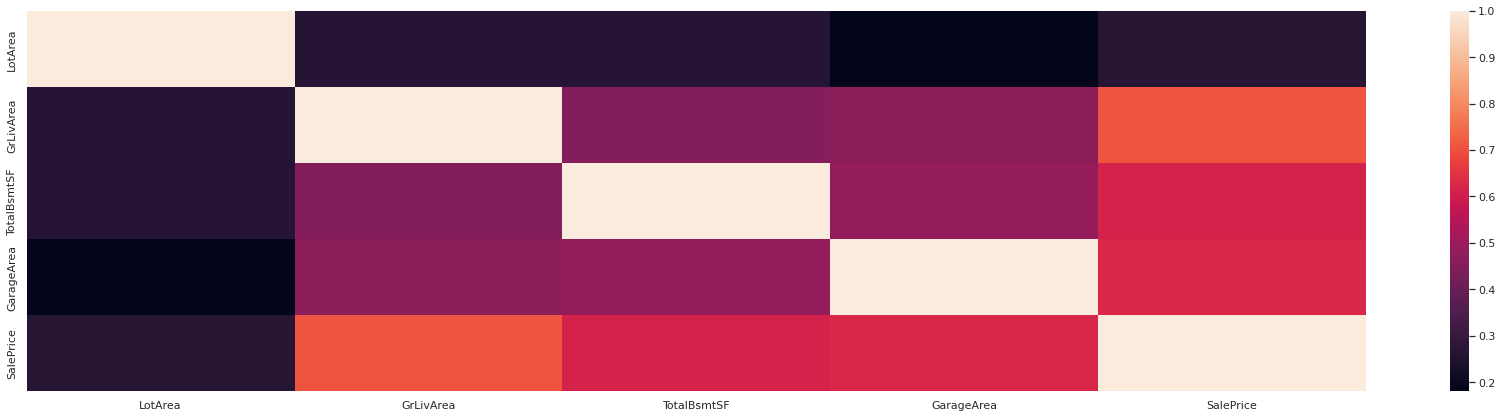

In [26]:
#Create DataFrame containing only variables from Question and SalePrice
custom_dataset = dataset[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
#Calculate the correlation between all of the variables
correlations = custom_dataset.corr()
#Extract the correlation of SalePrice to the rest of the variables
print(correlations["SalePrice"])

sb.heatmap(correlations)

GrLivarea and GarageArea will help us the most in predicting "SalePrice" of houses in this data

# Question 2a

Number of MSSubClass Types : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


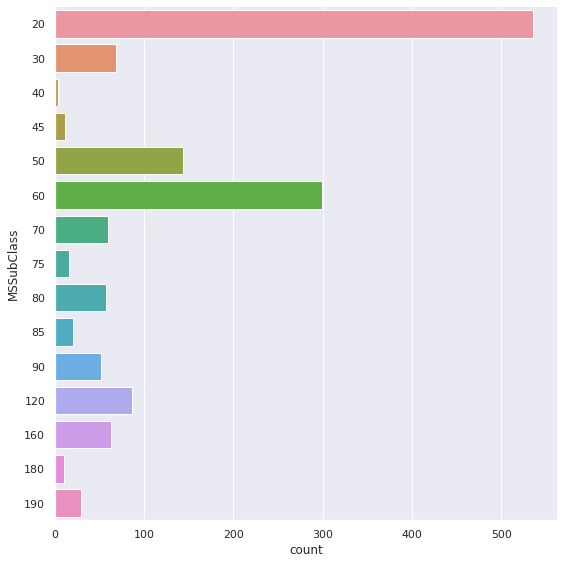

In [28]:
# MSSubClass in the Dataset
print("Number of MSSubClass Types :", len(dataset["MSSubClass"].unique()))

# Houses of each MSSubClass
print(dataset["MSSubClass"].value_counts())
sb.catplot(y = "MSSubClass", data = dataset, kind = "count", height = 8)

Number of Neighborhood Types : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


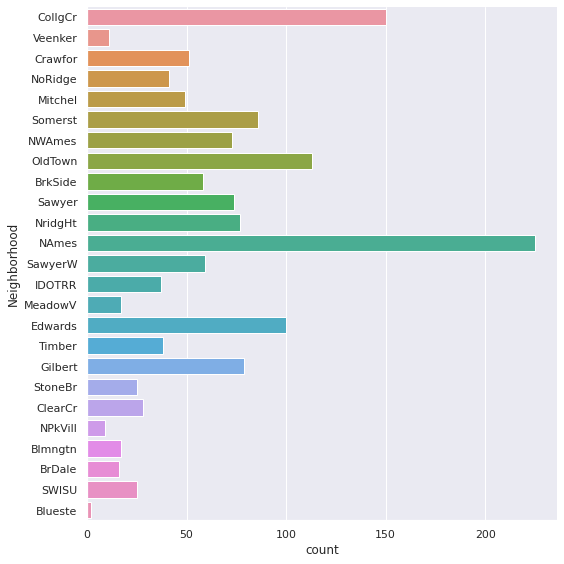

In [29]:
# Neighborhood in the Dataset
print("Number of Neighborhood Types :", len(dataset["Neighborhood"].unique()))

# Houses of each Neighborhood
print(dataset["Neighborhood"].value_counts())
sb.catplot(y = "Neighborhood", data = dataset, kind = "count", height = 8)

Number of BldgType Types : 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


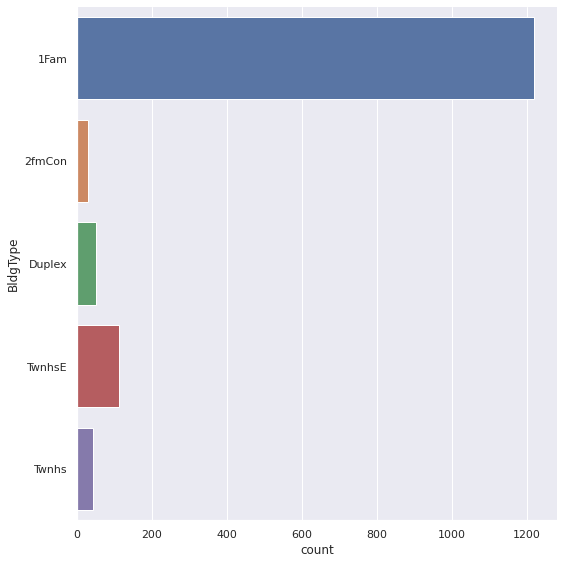

In [30]:
# BldgType in the Dataset
print("Number of BldgType Types :", len(dataset["BldgType"].unique()))

# Houses of each BldgType
print(dataset["BldgType"].value_counts())
sb.catplot(y = "BldgType", data = dataset, kind = "count", height = 8)

Number of OverallQual Types : 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


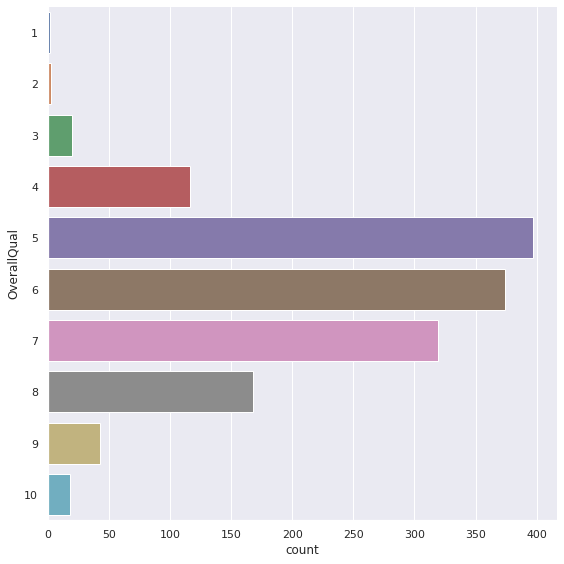

In [31]:
# OverallQual in the Dataset
print("Number of OverallQual Types :", len(dataset["OverallQual"].unique()))

# Houses of each OverallQual
print(dataset["OverallQual"].value_counts())
sb.catplot(y = "OverallQual", data = dataset, kind = "count", height = 8)

Neighborhood has 25 levels and is the highest. The Neighborhood "NAmes" has the highest number of houses, 225. "NAmes" refers to North Ames

# Question 2b

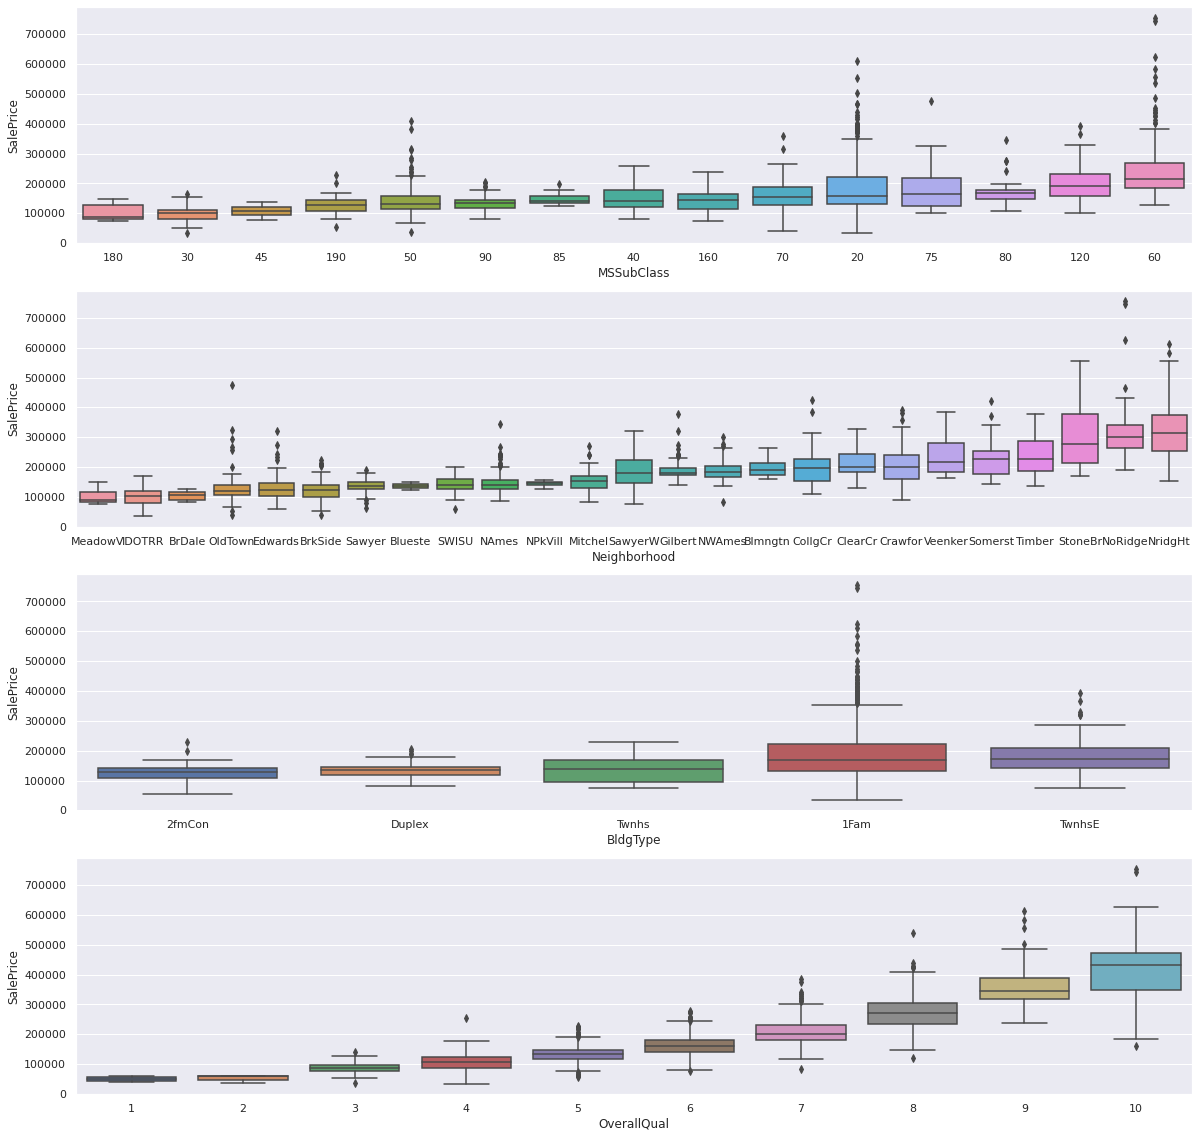

In [56]:
categorical = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
fig, ax = plt.subplots(4,1, figsize=(20, 20))
for var, subplot in zip(categorical, ax.flatten()):
    sorted_nb = dataset.groupby([var])['SalePrice'].median().sort_values()
    sb.boxplot(x=var, y='SalePrice', data=dataset, ax=subplot, order=list(sorted_nb.index))

OverallQual and Neighborhood will help us the most in predicting "SalePrice" of houses in this data

# Question 3a

Number of GarageType Types : 7
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


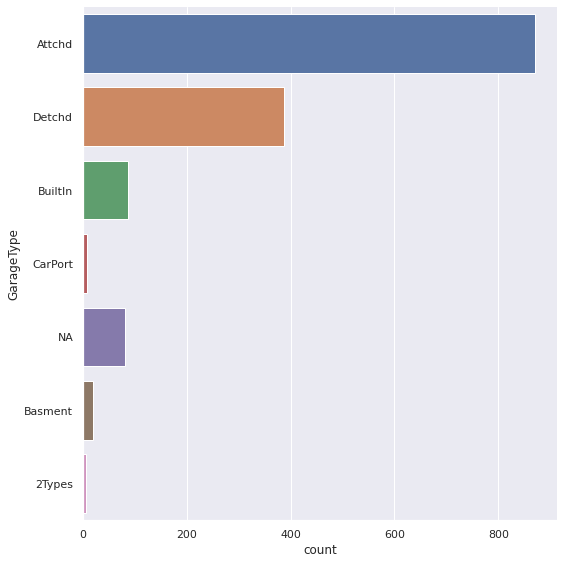

In [63]:
# GarageType in the Dataset
print("Number of GarageType Types :", len(dataset["GarageType"].unique()))

# Houses of each GarageType
dataset["GarageType"] = dataset["GarageType"].fillna("NA")
print(dataset["GarageType"].value_counts())
sb.catplot(y = "GarageType", data = dataset, kind = "count", height = 8)

In [62]:
dataset["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

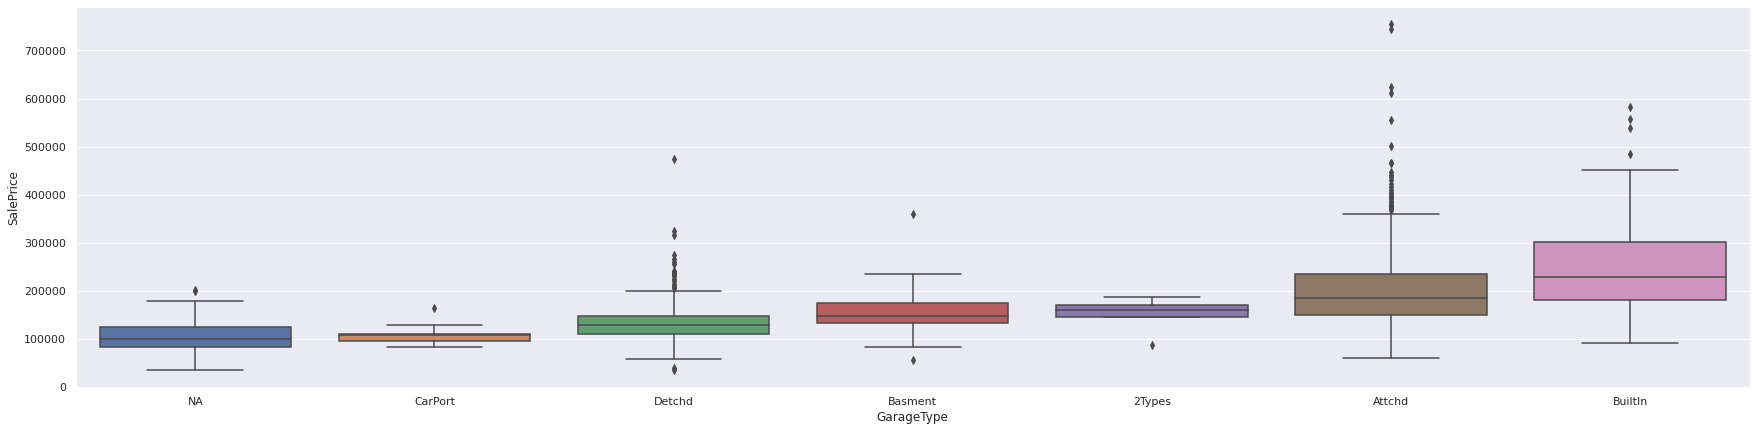

In [65]:
sorted_nb = dataset.groupby(["GarageType"])['SalePrice'].median().sort_values()
sb.boxplot(x=dataset["GarageType"], y=dataset["SalePrice"], order=list(sorted_nb.index))

Base on the boxplot above, it is evident that the SalePrice of a house is affected by the type of Garage and NOT whether it has a Garage.